In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# better visualizations
sns.set(style="whitegrid")

In [2]:
# Loading the dataset
data = pd.read_csv('../data/house_prices.csv')

# Exploring this dataset
print(data.head())
print(data.info())
print(data.describe())

                                      Name  \
0                         Casagrand ECR 14   
1    Ramanathan Nagar, Pozhichalur,Chennai   
2                              DAC Prapthi   
3  Naveenilaya,Chepauk, Triplicane,Chennai   
4                 VGN Spring Field Phase 1   

                                      Property Title     Price  \
0  4 BHK Flat for sale in Kanathur Reddikuppam, C...  ₹1.99 Cr   
1  10 BHK Independent House for sale in Pozhichal...  ₹2.25 Cr   
2      3 BHK Flat for sale in West Tambaram, Chennai   ₹1.0 Cr   
3  7 BHK Independent House for sale in Triplicane...  ₹3.33 Cr   
4              2 BHK Flat for sale in Avadi, Chennai   ₹48.0 L   

                                   Location  Total_Area  Price_per_SQFT  \
0             Kanathur Reddikuppam, Chennai        2583          7700.0   
1     Ramanathan Nagar, Pozhichalur,Chennai        7000          3210.0   
2  Kasthuribai Nagar, West Tambaram,Chennai        1320          7580.0   
3   Naveenilaya,Chepauk, T

In [3]:
#for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values[missing_values > 0])

Missing values in each column:
 Series([], dtype: int64)


In [4]:
# Fill missing numerical values with the median
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols] = data[numerical_cols].fillna(data[numerical_cols].median())

In [5]:
# Fill missing categorical values with the mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

/var/folders/39/jlld53_d7bn_qgbpytxhynfr0000gn/T/ipykernel_3255/2463335169.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


In [6]:
# due to error, Filling missing categorical values with the mode, using assignment without inplace
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    mode_value = data[col].mode()[0]
    data[col] = data[col].fillna(mode_value)

In [7]:
# Identify columns with more than 50% missing values
high_missing_cols = data.columns[data.isnull().mean() > 0.5]
print("Columns with more than 50% missing values:", high_missing_cols.tolist())


Columns with more than 50% missing values: []


In [8]:
# Drop columns with high missing values
data.drop(columns=high_missing_cols, inplace=True)


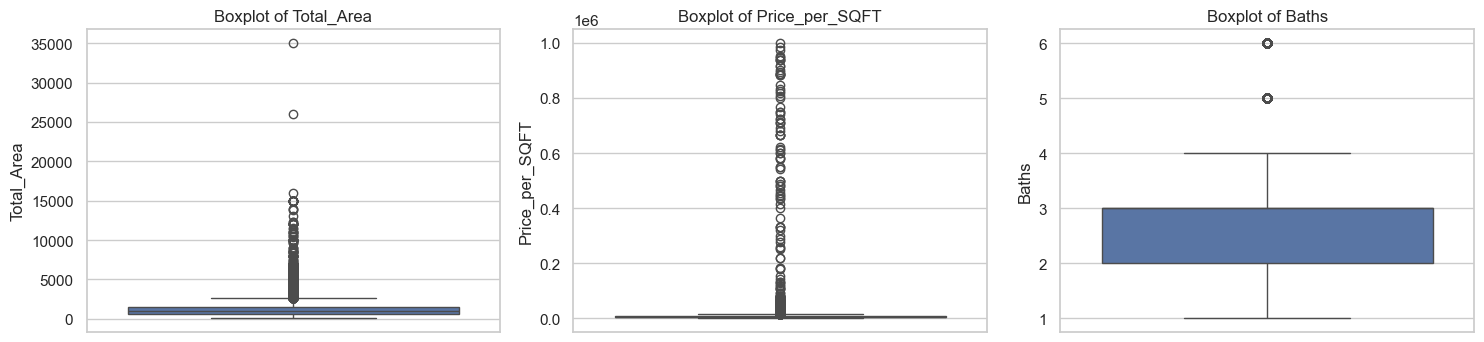

In [9]:
#handling outliers
# Visualize outliers in numerical columns using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [10]:
# Applied one-hot encoding to categorical columns
data = pd.get_dummies(data, drop_first=True)

In [11]:
# Displaying all remaining columns in the DataFrame
print("Remaining columns:\n", data.columns.tolist())

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [12]:
# due to error i only Displaying the first 20 columns
print("First 20 columns:\n", data.columns[:20].tolist())


First 20 columns:
 ['Total_Area', 'Price_per_SQFT', 'Baths', 'Name_   Manganahalli    Sriram Layout ,Ullal Uppanagar, Bangalore', 'Name_   sona Building,Bhayandar West, Mumbai', 'Name_  Oxford Blues', 'Name_  Sec 2 Pooja apartment Bhosari ,Indrayani Nagar Sector 2, Bhosari,Pune', 'Name_ A Knight Ventures Sachh by A Knight Reliant India Pvt Ltd', 'Name_ A N SWAGATH,Gubbalala, Subramanyapura,Bangalore', 'Name_ A wing Sang,Ghartan Pada, Dahisar East,Mumbai', 'Name_ Aditya Palace', 'Name_ Aero Paradise Plot', 'Name_ Aishwaryam Hamara Phase II', 'Name_ Akshara apartment ,Tambaram East, Chennai', 'Name_ Akshat Apartment', 'Name_ Akshay Vihar', 'Name_ Ambrosia Apartment', 'Name_ Amina Manzil', 'Name_ Anugraha Apartments', 'Name_ Aravali Apartments,Alaknanda, New Delhi']


In [13]:
# summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14528 entries, 0 to 14527
Columns: 38935 entries, Total_Area to Balcony_Yes
dtypes: bool(38932), float64(1), int64(2)
memory usage: 539.7 MB


In [14]:
# Get count of columns by data type
print("Numerical columns:", len(data.select_dtypes(include=['float64', 'int64']).columns))
print("Categorical columns:", len(data.select_dtypes(include=['object']).columns))


Numerical columns: 3
Categorical columns: 0


In [15]:
# here a first few rows of the cleaned DataFrame
data.head()


,Total_Area,Price_per_SQFT,Baths,"Name_ Manganahalli Sriram Layout ,Ullal Uppanagar, Bangalore","Name_ sona Building,Bhayandar West, Mumbai",Name_ Oxford Blues,"Name_ Sec 2 Pooja apartment Bhosari ,Indrayani Nagar Sector 2, Bhosari,Pune",Name_ A Knight Ventures Sachh by A Knight Reliant India Pvt Ltd,"Name_ A N SWAGATH,Gubbalala, Subramanyapura,Bangalore","Name_ A wing Sang,Ghartan Pada, Dahisar East,Mumbai",...,"Description_₹ 30L\n\n50guj L shape corner house\nIncluded Hall, kitchen,2 washroom and shop\n\nAddress-\nMundka bhagya vihar gali no.4 block A near divya garden \n\n100m from mainroad road\n\n3.5km from mundka metro station More About This Property A 1 BHK Independent House for sale in Mubarakpur Dabas, Delhi. Posted by Owner, No brokerage involved. This beautifully designed 1 BHK unit with all the modern-day comforts is one of Mubarakpur Dabas's most desired properties. Contact now for more information. The price of this Independent House is Rs 30.0 L. Each unit has a built-up area of 446 Square feet. There are 1 ...","Description_▪︎ 1 BHK house (fully furnished ready to move) for sale\n▪︎ Building no. 41, 2nd Floor\nTilak Nagar, Chembur\n▪︎ Area - 370 Sq Ft Usable Carpet\n▪︎ 24 hrs water supply \n▪︎ Nearby locality - Play ground, School, Grocery shops, Restaurant\n▪︎ Price - 1.10 Cr (Negotiable) More About This Property Best 1 BHK Apartment for modern-day lifestyle is now available for sale. No brokerage involved, Posted by Owner. Grab this 1 BHK property for sale in one of Mumbai's top location, Kurla. It is situated on floor 2. The total number of floors in this Apartment is 10. The property price of this unit is Rs 89.2 L...","Description_✅ Apartment Located beside one of the holiest Hindu *Tripura Sundari Mandir* ( Shakti temple) \n\n✅ Local Market 2 Mins , Metro 5 mins , Metropolitan Bypass 6 Mins , 5&6 No Garia Bus Stand - 6 mins , Hospital 10 mins , BD Memorial & Future Campus School 6 mins , Hospitals within 10 mins \n\n✅ *Covered Parking* - 🚗 Owned \n\n✅ *Visitor parking available* - outside \n\n✅ _Water Filter Plant for Apartment_ \n\n *Main Door* 🚪\n\n✅ Covered and solid main door frame with door set latch lock and and imported main door handle.\n\n✅ Individual collapsible gate.\n\n *Living and dining area* \n\n\n \n\n✅ Study Chair\n...","Description_✓ Four side open well-maintained Bunglow built on 2.25 katha land\n✓ Located within a Gated Society with neighbourhood\n✓ Corner plot with 12 feet and 16 feet road on two sides\n✓ Ground Floor: Balcony, Living Room, Dining Room, Bathroom, Kitchen, Staircase Room\n✓ First Floor: 3 bedrooms, 2 built in wall cabinets, 2 balconies, 1 bathroom\n✓ Second Floor: 1 bedroom, 1 Puja Room, Covered Terrace\n✓ Covered terrace\n✓ Covered garage\n✓ Covered lawn space\n✓ 1750 litre water reservoir and fresh water supply from Garden Reach\n✓ 5 kms from Behala Chowrasta Metro station, located on the Biren Roy Road West\n...","Description_⭐️2 BHK fully furnished flat is for sale:⭐️\nSociety: Rohit Park II, Morya colony, Kalewadi-411017\nEast facing at 5th floor\nBuilt area: 857 Sq ft.\nCarpet area: 660 Sq ft.\nPOP for all walls and ceiling \nInvertor backup for all electricity boards\nHanging lights in hall and bedrooms\nProvision for Broadband\n4 wheeler cover parking\nHall connected Gallery\nOld: 12 years\nHall:\n\tTV Unit\n\tIndian Sitting\nKitchen:\n\tCrockery Units\n\tTemple\n\tProvision for Water Filter\n\tKitchen Trolley\nMaster Bedroom:\n\tTrolley Bed and side table\n\t2 Wardrobes\n\tTV unit & Book Shelf\n\tDressing table\n\tProvision for AC\nOther Bedroom...","Description_𝐋𝐮𝐱𝐮𝐫𝐲 Apartments @33 𝐋𝐚𝐤𝐡𝐬* onwards.\nProject is located in Chandapura close to Electronic city\n𝐋𝐨𝐚𝐧𝐬 Available from all M𝗮𝗷𝗼𝗿 B𝗮𝗻𝗸𝘀\nBMRDA approved | A-Katha\n𝐕𝐚𝐚𝐬𝐭𝐮 Compliant with All 𝐌𝐨𝐝𝐞𝐫𝐧 Amenities,\nWell planned Vaastu compliant Apartments.\n More About This Property Best 2 BHK Apartment for modern-day lifestyle is now available for sale. No brokerage involved, Posted by Owner. Grab this 2 BHK

In [16]:
# Checking for missing values in core features
missing_values = data[['Total_Area', 'Price_per_SQFT', 'Baths']].isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 Total_Area        0
Price_per_SQFT    0
Baths             0
dtype: int64


In [17]:
# Check for Missing Values
missing_values = data[['Total_Area', 'Price_per_SQFT', 'Baths']].isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 Total_Area        0
Price_per_SQFT    0
Baths             0
dtype: int64


In [18]:
# Check for Negative or Zero Values
# Total_Area and Price_per_SQFT should be positive
inconsistent_total_area = data[data['Total_Area'] <= 0]
inconsistent_price_per_sqft = data[data['Price_per_SQFT'] <= 0]

# Checking if 'Baths' contains non-integer float values
inconsistent_baths = data[data['Baths'] % 1 != 0]  # This will check for non-integer values

print(f"Entries with inconsistent 'Total_Area': {len(inconsistent_total_area)}")
print(f"Entries with inconsistent 'Price_per_SQFT': {len(inconsistent_price_per_sqft)}")
print(f"Entries with non-integer 'Baths': {len(inconsistent_baths)}")


Entries with inconsistent 'Total_Area': 0
Entries with inconsistent 'Price_per_SQFT': 3
Entries with non-integer 'Baths': 0


In [19]:
# Basic Statistics for Range Overview
print("Statistics for core features:\n")
print(data[['Total_Area', 'Price_per_SQFT', 'Baths']].describe())

Statistics for core features:

         Total_Area  Price_per_SQFT         Baths
count  14528.000000    14528.000000  14528.000000
mean    1297.916988    11719.456222      2.751239
std     1245.694305    49036.068632      0.898243
min       70.000000        0.000000      1.000000
25%      650.000000     4480.000000      2.000000
50%     1000.000000     6050.000000      3.000000
75%     1439.000000     9312.500000      3.000000
max    35000.000000   999000.000000      6.000000


In [20]:
# Outlier Detection using Interquartile Range (IQR) for 'Total_Area' and 'Price_per_SQFT'
Q1 = data[['Total_Area', 'Price_per_SQFT']].quantile(0.25)
Q3 = data[['Total_Area', 'Price_per_SQFT']].quantile(0.75)
IQR = Q3 - Q1

# Outliers lie below Q1 - 1.5*IQR or above Q3 + 1.5*IQR
outliers_total_area = data[(data['Total_Area'] < (Q1['Total_Area'] - 1.5 * IQR['Total_Area'])) |
                           (data['Total_Area'] > (Q3['Total_Area'] + 1.5 * IQR['Total_Area']))]
outliers_price_per_sqft = data[(data['Price_per_SQFT'] < (Q1['Price_per_SQFT'] - 1.5 * IQR['Price_per_SQFT'])) |
                               (data['Price_per_SQFT'] > (Q3['Price_per_SQFT'] + 1.5 * IQR['Price_per_SQFT']))]

print(f"Outliers in 'Total_Area': {len(outliers_total_area)}")
print(f"Outliers in 'Price_per_SQFT': {len(outliers_price_per_sqft)}")

Outliers in 'Total_Area': 1162
Outliers in 'Price_per_SQFT': 1398


In [21]:
# Filtering out unrealistic values in 'Price_per_SQFT'
data = data[(data['Price_per_SQFT'] > 500) & (data['Price_per_SQFT'] < 100000)]

# Verifying the changes
print("Entries after removing inconsistent 'Price_per_SQFT' values:", len(data))


Entries after removing inconsistent 'Price_per_SQFT' values: 14434


In [22]:
# Filter out unrealistic values in 'Total_Area'
data = data[(data['Total_Area'] >= 70) & (data['Total_Area'] <= 5000)]

# Verifying the changes
print("Entries after removing outliers in 'Total_Area':", len(data))


Entries after removing outliers in 'Total_Area': 14212


In [23]:
# Final check for missing values
print("Remaining missing values:\n", data.isnull().sum())

# Recalculate statistics for core features to confirm changes
print("Updated statistics for core features:\n", data[['Total_Area', 'Price_per_SQFT', 'Baths']].describe())


Remaining missing values:
 Total_Area                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     0
Price_per_SQFT                                                                                                                                                                                                                                                                                                                                              

In [24]:
# Instantiate the scaler
scaler = StandardScaler()

# Select features to scale
features_to_scale = ['Total_Area', 'Price_per_SQFT']
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Verify the scaling
print("Scaled data:\n", data[features_to_scale].head())


Scaled data:
    Total_Area  Price_per_SQFT
0    1.729094       -0.081384
2    0.165389       -0.098074
3    3.792987       -0.061912
4   -0.280323       -0.456904
5   -0.305084       -0.561216


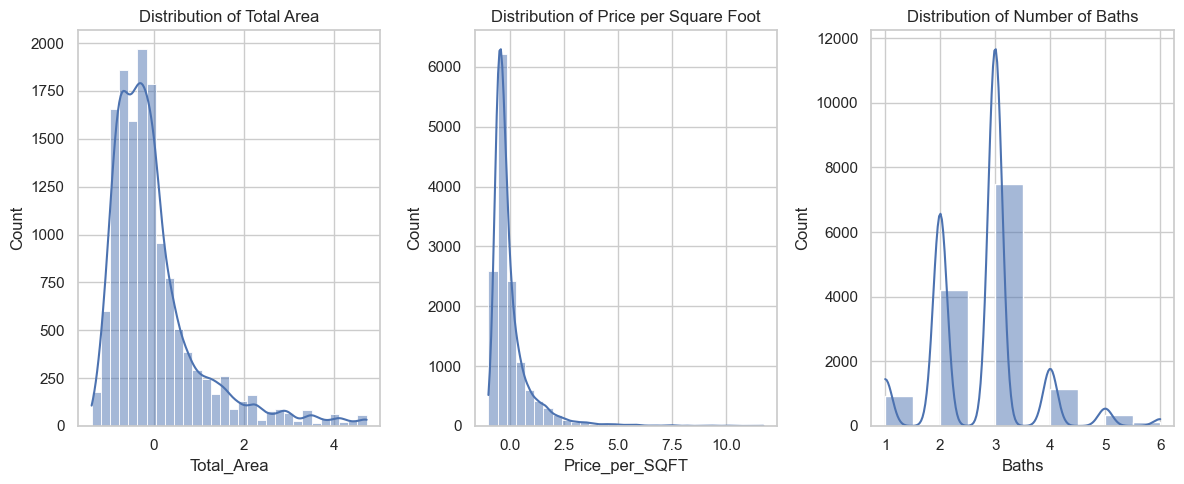

In [25]:


# Distribution of Total_Area
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sns.histplot(data['Total_Area'], bins=30, kde=True)
plt.title('Distribution of Total Area')

# Distribution of Price_per_SQFT
plt.subplot(1, 3, 2)
sns.histplot(data['Price_per_SQFT'], bins=30, kde=True)
plt.title('Distribution of Price per Square Foot')

# Distribution of Baths
plt.subplot(1, 3, 3)
sns.histplot(data['Baths'], bins=10, kde=True)
plt.title('Distribution of Number of Baths')

plt.tight_layout()
plt.show()


In [26]:
%whos


Variable                      Type              Data/Info
---------------------------------------------------------
GradientBoostingRegressor     ABCMeta           <class 'sklearn.ensemble.<...>adientBoostingRegressor'>
GridSearchCV                  ABCMeta           <class 'sklearn.model_sel<...>on._search.GridSearchCV'>
IQR                           Series            Total_Area         789.0\<...>   4832.5\ndtype: float64
LinearRegression              ABCMeta           <class 'sklearn.linear_mo<...>._base.LinearRegression'>
Q1                            Series            Total_Area         650.0\<...>ame: 0.25, dtype: float64
Q3                            Series            Total_Area        1439.0\<...>ame: 0.75, dtype: float64
RandomForestRegressor         ABCMeta           <class 'sklearn.ensemble.<...>t.RandomForestRegressor'>
StandardScaler                type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
categorical_cols              Index             Inde

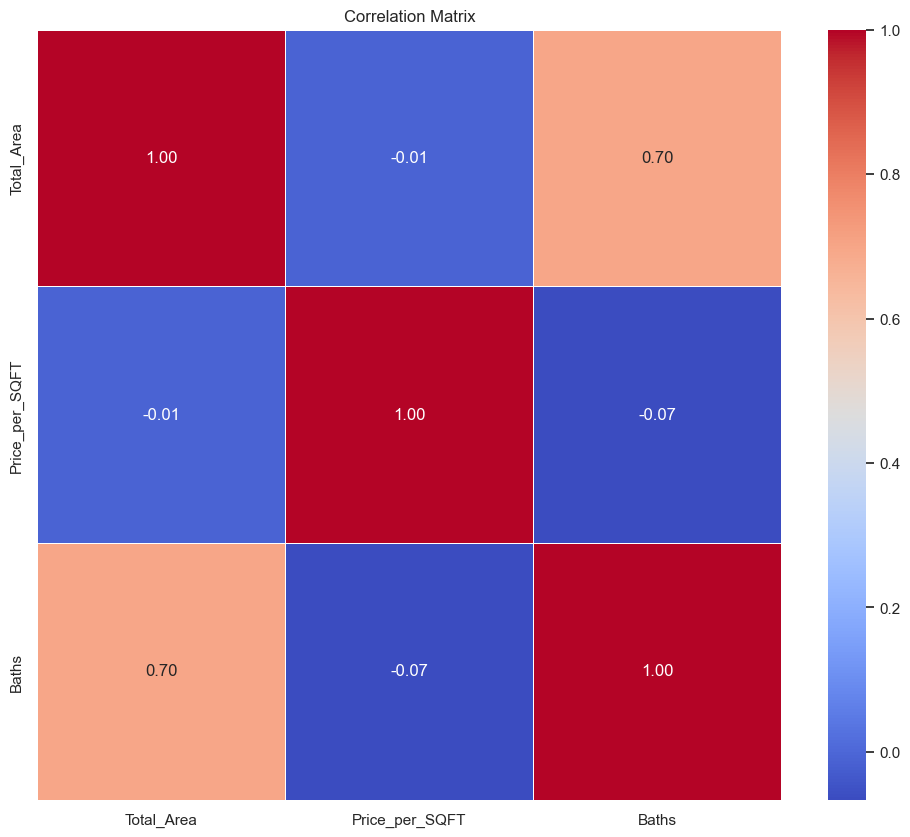

In [27]:
# Filter for numerical columns only
numerical_data = data.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [28]:
# Removing features with high correlation
def remove_highly_correlated(data, threshold=0.9):
    corr_matrix = data.corr().abs()
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
    return data.drop(columns=to_drop)

# Applying the function
cleaned_data = remove_highly_correlated(numerical_data)
print("Features retained:", cleaned_data.columns)


Features retained: Index(['Total_Area', 'Price_per_SQFT', 'Baths'], dtype='object')


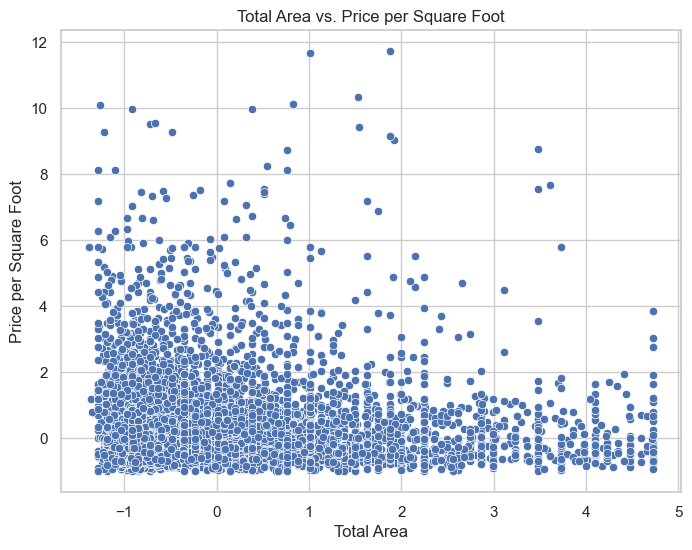

In [29]:
# Scatter plot of Total_Area vs. Price_per_SQFT
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Area', y='Price_per_SQFT', data=data)
plt.title('Total Area vs. Price per Square Foot')
plt.xlabel('Total Area')
plt.ylabel('Price per Square Foot')
plt.show()


In [30]:
print("Columns in cleaned_data:", cleaned_data.columns)
print("Columns in data:", data.columns)


Columns in cleaned_data: Index(['Total_Area', 'Price_per_SQFT', 'Baths'], dtype='object')
Columns in data: Index(['Total_Area', 'Price_per_SQFT', 'Baths',
       'Name_   Manganahalli    Sriram Layout ,Ullal Uppanagar, Bangalore',
       'Name_   sona Building,Bhayandar West, Mumbai', 'Name_  Oxford Blues',
       'Name_  Sec 2 Pooja apartment Bhosari ,Indrayani Nagar Sector 2, Bhosari,Pune',
       'Name_ A Knight Ventures Sachh by A Knight Reliant India Pvt Ltd',
       'Name_ A N SWAGATH,Gubbalala, Subramanyapura,Bangalore',
       'Name_ A wing Sang,Ghartan Pada, Dahisar East,Mumbai',
       ...
       'Description_₹ 30L\n\n50guj L shape corner house\nIncluded Hall, kitchen,2 washroom and shop\n\nAddress-\nMundka bhagya vihar gali no.4 block A near divya garden \n\n100m from mainroad road\n\n3.5km from mundka metro station More About This Property A 1 BHK Independent House for sale in Mubarakpur Dabas, Delhi. Posted by Owner, No brokerage involved. This beautifully designed 1 BHK u

In [31]:
# Search for column names containing "Price"
target_columns = [col for col in data.columns if 'Price' in col]
print("Columns containing 'Price':", target_columns)


Columns containing 'Price': ['Price_per_SQFT', 'Price_₹1.0 Cr', 'Price_₹1.0 L', 'Price_₹1.01 Cr', 'Price_₹1.02 Cr', 'Price_₹1.03 Cr', 'Price_₹1.04 Cr', 'Price_₹1.05 Cr', 'Price_₹1.06 Cr', 'Price_₹1.07 Cr', 'Price_₹1.08 Cr', 'Price_₹1.09 Cr', 'Price_₹1.1 Cr', 'Price_₹1.1 L', 'Price_₹1.11 Cr', 'Price_₹1.11 L', 'Price_₹1.12 Cr', 'Price_₹1.13 Cr', 'Price_₹1.14 Cr', 'Price_₹1.15 Cr', 'Price_₹1.16 Cr', 'Price_₹1.17 Cr', 'Price_₹1.18 Cr', 'Price_₹1.19 Cr', 'Price_₹1.2 Cr', 'Price_₹1.2 L', 'Price_₹1.21 Cr', 'Price_₹1.22 Cr', 'Price_₹1.23 Cr', 'Price_₹1.24 Cr', 'Price_₹1.25 Cr', 'Price_₹1.26 Cr', 'Price_₹1.27 Cr', 'Price_₹1.28 Cr', 'Price_₹1.29 Cr', 'Price_₹1.3 Cr', 'Price_₹1.31 Cr', 'Price_₹1.32 Cr', 'Price_₹1.33 Cr', 'Price_₹1.34 Cr', 'Price_₹1.35 Cr', 'Price_₹1.36 Cr', 'Price_₹1.37 Cr', 'Price_₹1.38 Cr', 'Price_₹1.39 Cr', 'Price_₹1.4 Cr', 'Price_₹1.41 Cr', 'Price_₹1.42 Cr', 'Price_₹1.43 Cr', 'Price_₹1.44 Cr', 'Price_₹1.45 Cr', 'Price_₹1.46 Cr', 'Price_₹1.47 Cr', 'Price_₹1.48 Cr', 'Price_₹1.4

In [32]:
#target variable and features
target = 'Price_per_SQFT'
features = ['Total_Area', 'Baths']

X = data[features]
y = data[target]

In [33]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 11369
Testing set size: 2843


In [34]:
# Initializing and train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = lr_model.predict(X_test)

In [35]:
# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


Mean Absolute Error (MAE): 0.6259343057128798
Mean Squared Error (MSE): 1.0027403731541196
Root Mean Squared Error (RMSE): 1.001369249155435


In [36]:
# lets try using random forest reggressor. in the following.

In [37]:

# Initializing the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


In [38]:
# Train model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
# Predict on the test set
y_pred_rf = rf_model.predict(X_test)


In [40]:
# Calculate and print evaluation metrics for Random Forest
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Regressor Results:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")

Random Forest Regressor Results:
Mean Absolute Error (MAE): 0.6406495198258089
Mean Squared Error (MSE): 1.0681275897553295
Root Mean Squared Error (RMSE): 1.033502583332683


In [41]:
# lets try using GBR

In [42]:
# Initializing the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)


In [43]:
# Training model on the training data
gb_model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [44]:
# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate and print evaluation metrics
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

print("Gradient Boosting Regressor Results:")
print(f"Mean Absolute Error (MAE): {mae_gb}")
print(f"Mean Squared Error (MSE): {mse_gb}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb}")


Gradient Boosting Regressor Results:
Mean Absolute Error (MAE): 0.6117264508282145
Mean Squared Error (MSE): 0.9666360607824388
Root Mean Squared Error (RMSE): 0.9831765155771566


In [45]:
# i will try Gradient Boosting model to improve the model performance.

# focusing on hyperparameter tuning

# We'll use Grid Search or Randomized Search for tuning.

In [46]:

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [47]:
# We will use GridSearchCV to search for the best combination of parameters.

# Initialize the model
gb_model = GradientBoostingRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

# grid search
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

In [48]:
# Evaluate the best model.


In [49]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [50]:
# Evaluate the best model on the test data
y_pred_best = best_model.predict(X_test)

In [51]:
# Calculate metrics
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)

print("Optimized Gradient Boosting Results:")
print(f"Mean Absolute Error (MAE): {mae_best}")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"Root Mean Squared Error (RMSE): {rmse_best}")

Optimized Gradient Boosting Results:
Mean Absolute Error (MAE): 0.6119295892496149
Mean Squared Error (MSE): 0.9641250912736019
Root Mean Squared Error (RMSE): 0.9818987174213041


In [52]:
#Now i have deploying my model.

In [53]:
import joblib

# Saving my trained model
joblib.dump(best_model, 'house_price_predictor_model.pkl')

['house_price_predictor_model.pkl']

In [54]:
# Now creating a function that loads the saved model and uses it for predictions. 
# Let’s assume have a new input data (e.g., for a new house) and want to predict its price.

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
import joblib

# Example training process (adjust with your actual data)
X_train = [[1000, 5000, 3], [1200, 5500, 4], [800, 4500, 2]]  # Example data
y_train = [10000000, 13000000, 8000000]  # Example target prices

# Initialize the scaler and model
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = GradientBoostingRegressor()
model.fit(X_train_scaled, y_train)

# Save both the model and the scaler
joblib.dump(model, 'house_price_predictor_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [56]:
import joblib
import pandas as pd

# Load the trained model and scaler
model = joblib.load('house_price_predictor_model.pkl')
scaler = joblib.load('scaler.pkl')

# Prediction function
def predict_house_price(input_data):
    """
    Predict the house price based on input data
    input_data: list of feature values in the same order as the training data
    """
    # Convert input data to a DataFrame with the same column names as the training data
    column_names = ['Total_Area', 'Price_per_SQFT', 'Baths']  # Replace with the exact columns used for training
    input_df = pd.DataFrame([input_data], columns=column_names)

    # Scale the input data using the scaler (convert DataFrame to numpy array)
    input_scaled = scaler.transform(input_df.values)  # Use .values to get the numpy array

    # Make prediction using the loaded model
    prediction = model.predict(input_scaled)

    # Return the prediction result
    return prediction[0]

# Example
input_data = [1000, 5000, 3]  # Example input: Total_Area = 1000, Price_per_SQFT = 5000, Baths = 3
predicted_price = predict_house_price(input_data)
print(f"Predicted House Price: {predicted_price}")


Predicted House Price: 10000008.853799623


In [57]:
# try the Example
input_data = [1200, 6000, 4]  # Example input: Total_Area = 1200, Price_per_SQFT = 6000, Baths = 4
predicted_price = predict_house_price(input_data)
print(f"Predicted House Price: {predicted_price}")


Predicted House Price: 12999929.169602975


In [ ]:
from flask import Flask, request, jsonify
import joblib

# Load the trained model
model = joblib.load('house_price_predictor_model.pkl')

# Initialize Flask app
app = Flask(__name__)

# Define prediction endpoint
# welcome route
@app.route('/')
def home():
    return "Welcome to the House Price Prediction API! Use the '/predict' endpoint to make predictions."

@app.route('/predict', methods=['POST'])
def predict():
    try:
        # Get data from the POST request
        data = request.get_json()
        
        # Extract features from the request
        total_area = data['Total_Area']
        price_per_sqft = data['Price_per_SQFT']
        baths = data['Baths']
        
        # Make prediction
        input_data = [total_area, price_per_sqft, baths]
        prediction = model.predict([input_data])
        
        # Return the prediction result as JSON
        return jsonify({'predicted_price': prediction[0]})
    
    except Exception as e:
        return jsonify({'error': str(e)})

# Run the app
if __name__ == '__main__':
    app.run(port=5005)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5005
Press CTRL+C to quit
127.0.0.1 - - [15/Nov/2024 17:43:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2024 17:43:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2024 17:44:16] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2024 17:44:20] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2024 17:44:26] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [15/Nov/2024 17:44:32] "GET / HTTP/1.1" 200 -


[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.9s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.05, max_dep